<a href="https://colab.research.google.com/github/StephenNaboth/Machine_learning/blob/main/Example_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
#load the Data
oecd_bli = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv",
                             thousands=',', delimiter='\t', encoding='latin1', na_values='N/A')

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare the Data


In [ ]:
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the Data

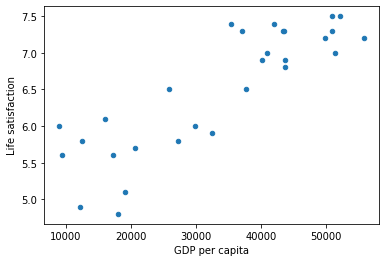

In [ ]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model

In [ ]:
lin_reg_model = sklearn.linear_model.LinearRegression()


# Train the model

In [ ]:
lin_reg_model.fit(x,y)
predict_y = lin_reg_model.predict(x)


# Plot the regression

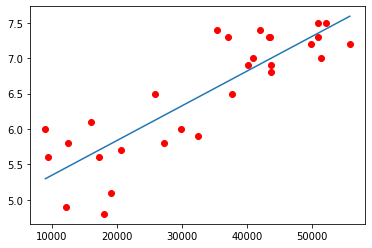

In [ ]:
fig, ax= plt.subplots()
ax.plot(x,predict_y)
ax.scatter(x,y,c='r')

In [ ]:
# Prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new))

[[5.96242338]]
